# Logistic Regression
-----

## Theory

Logistic regression introduces the new concept of classification. In comparison, linear regression etc. are used to calculate, based on miscellaneous input values, a real number that is directly applicable in the real world. E.g., using linear regression to determine the relationship between the age, in years, of a person and the length, in hours, of time they spend on the internet each day. The result is a real number which corresponds to a quantity of hours. In the beginning of the classification procedure a fixed set of classes is defined. In the most simplistic scenario there are two labels. In general one of the two labels is associated with the presence of a certain "something" while the other one is associated with it's absence. In medicine, for example, the judgement whether the detected tumour inside a person's brain is malignant or non-malignant can be viewed as a classification problem. The "something" in this scenario would be the tumour being malignant or non-malignent. The classes are encoded as natural numbers starting at zero. To accomplish this the previously used model will be enhanced using the sigmoid function:

$$\begin{eqnarray}
sig(z) = \frac{1}{1 + e^{-z}}
\tag{1}
\end{eqnarray}$$

The following image displays a plot of the sigmoid function. The corresponding limits are below the image:

![](graphics/sigmoid_function.png)

$$\begin{eqnarray}
\lim_{x \to -\infty} sig(z) = 0 &&&& \text{and} && \lim_{x \to \infty} sig(z) = 1 
\tag{2}
\end{eqnarray}$$

Regardless of the input $z$ the result is will always be between $0$ and $1$. In logistic regression $z$ will be substituted with the previously used model. The result is as follows:

$$\begin{eqnarray}
h(x, \theta) = \frac{1}{1 + e^{-x^T\theta}}
\tag{3}
\end{eqnarray}$$

Finally a threshold $\tau$ will be applied. Is a value smaller then the threshold it is set to $0$, is it bigger it will be set to $1$:

$$\begin{eqnarray}
     y = \left\{\begin{array}{ll} 1, & h(x, \theta) \ge \tau \\
         0, & h(x, \theta) < \tau\end{array}\right. .
\tag{4}
\end{eqnarray}$$

If an input $x$ results in an output $y$ then $x$ is classified as $y$.

Since the model was modified the previously used cost function is not applicable anymore. A new one must be formulated. Therefore the partial derivatives might change so the gradient descent equation for updating $\theta$ has to be adjusted as well.

#### Cost Function

To start with it will be shown why the previously used cost function cannot be used anymore. Here is the cost function again:

$$\begin{eqnarray}
J(x, \theta) = \frac{1}{2m} \sum_{k=1}^m[h_{lin}(x^{(k)}, \theta) - y^{(k)}]^2
\tag{5}
\end{eqnarray}$$

Because of the addition of the non-linear sigmoid function the cost function as seen in (5) can be non-convex. Here is an examplary plot for $x = [1, 3, 6, 1, 40, 10]^T$ and $y = [1, 0, 1, 1, 0, 1]^T$ that shows the possibility of non-convexity:

![](graphics/lin_reg_cost_in_log_reg_non-convex.png)

If gradient descent is used to minimize a non-convex function, convergence to the global minimum cannot be guaranteed. Therefore the resulting $\theta$ might not be the optimal solution. 

The new cost function incorporates that the ground truth labels can only be either $0$ or $1$ while the estimated values are in the interval $[0,1]$. It follows the intuition that the cost should maximize/be high if the estimated value is $1$ while the ground truth is $0$ and vise versa. The first approach is as follows:

$$\begin{eqnarray}
     Cost(h(x, \theta), y) = \left\{\begin{array}{ll} -log(h(x, \theta)), & y = 0 \\
         -log(1-h(x, \theta)), & y = 1 \end{array}\right. .
\tag{6}
\end{eqnarray}$$

In the case of $y = 1$ the cost $Cost(h(x, \theta), y) \to \infty$ if the estimated value $h(x, \theta) \to 1$.
In the other case of $y = 0$ the cost $Cost(h(x, \theta), y) \to \infty$ if the estimated value $h(x, \theta) \to 0$.

As the case notation of the cost function is inconvenient for implementation the function will be simplified:

$$\begin{eqnarray}
J(x, \theta) = -\frac{1}{m} \sum_{k=1}^m y^{(k)} log \; h(x^{(k)}, \theta) + (1 - y^{(k)})\; log(1 - h(x^{(k)}, \theta))
\tag{5}
\end{eqnarray}$$

The case differentiation is realized by multiplying the inappropriate case with $0$. This can be done by multiplying the case for $y = 1$ with $y$ and the case for $y = 0$ with ($1 - y$). This cost function is guaranteed to be convex. Therefore the resulting $\theta$ will be the optimal solution for the given training data.

To reduce the likelihood of overfitting, regularization is added to the cost function:

$$\begin{eqnarray}
J(x, \theta) = -\frac{1}{m} \sum_{k=1}^m y^{(k)} log \; h(x^{(k)}, \theta) + (1 - y^{(k)})\; log(1 - h(x^{(k)}, \theta)) + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2
\tag{6}
\end{eqnarray}$$

The added term functions as a second minimization goal. On top of the difference between the estimated value and the ground truth, the overall size of the $\theta_j$ is relevant as well. This reduces the complexity of the resulting model. Less complex models are less prone to overfitting. 

#### Gradient Descent

Luckily the partial derivatives for the new cost function are identical to the ones in (4) and (5) from [linear regression](linear_regression_one_variable.ipynb). The equation for updating $\theta$ will be reused:

$$\begin{eqnarray}
\theta^{t+1} = \theta^t - \frac{\alpha}{m} X^T (h(X, \theta) - \vec{y}) 
\tag{7}
\end{eqnarray}$$

The regularization term is still missing. The sum rule can be applied which results in: 

$$\begin{eqnarray}
\theta^{t+1} = \theta^t - \alpha [ \frac{1}{m} X^T (h(X, \theta) - \vec{y}) + \frac{\lambda}{m}\theta]
\tag{7}
\end{eqnarray}$$

-----

## The Implementation

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
                   
def compute_cost(x, y, theta, ld=1.0):
    m = y.shape[0] # number of samples
    h = sigmoid(np.matmul(x, theta)) # estimated values
    return - 1/m * sum(y * np.log(h) + (1 - y) * np.log(1 - h)) + ld / (2 * m) * sum(np.power(theta, 2))

def gradient_descent(x, y, x_test, y_test, theta=None, alpha=0.01, num_iters=100, ld=1.0, thresh=0.25):
    m, n = x.shape
    if theta is None:
        theta = np.random.rand(n, 1)
        
    # calc precision and recall for random initialization
    precisions = []
    recalls = []
    prediction = predict_with_thresh(x_test, theta, thresh)
    precision, recall = calc_precision_recall(y_test, prediction)
    precisions.append(precision)
    recalls.append(recall)

    # calculate cost for random initialization
    costs_train = []
    costs_test = []
    costs_train.append(compute_cost(x, y, theta))
    costs_test.append(compute_cost(x_test, y_test, theta))
    
    for i in range(num_iters):
        # update theta
        theta -= alpha * ((1 / m) * np.matmul(np.transpose(x), (sigmoid(np.matmul(x, theta)) - y)) + ld / m * theta)
        
        # calculate costs for updated theta
        costs_train.append(compute_cost(x, y, theta))
        costs_test.append(compute_cost(x_test, y_test, theta))
        
        # calculate precision&recall for new theta
        prediction = predict_with_thresh(x_test, theta, thresh)
        precision, recall = calc_precision_recall(y_test, prediction)
        precisions.append(precision)
        recalls.append(recall)

    return theta, costs_train, costs_test, precisions, recalls

def predict_with_thresh(x, theta, thresh):
    prediction = sigmoid(np.matmul(x, theta))
    if np.isscalar(prediction):
        return 1 if prediction >= thresh else 0

    prediction[prediction < thresh] = 0
    prediction[prediction >= thresh] = 1
    return prediction

# calculate precision and recall from predictions and groundtruth
def calc_precision_recall(y, prediction):
    tp_, fp_, fn_ = np.zeros(y.shape), np.zeros(y.shape), np.zeros(y.shape)

    tp_[(y == 1) * (prediction == 1)] = 1
    tp = sum(tp_)

    fp_[(y == 0) * (prediction == 1)] = 1
    fp = sum(fp_)

    fn_[(y == 1) * (prediction == 0)] = 1
    fn = sum(fn_)

    precision = tp / (tp + fp + 0.000000000001)
    recall = tp / (tp + fn + 0.000000000001)
    return round(precision[0],4), round(recall[0],4)

## The Data

In [2]:
# Download
if True: # enable if you want to download the dataset
    from urllib import request
    from shutil import copyfileobj

    data_name = "data/breast-cancer.data"
    data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"
    descr_name = "data/breast-cancer.names"
    descr_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.names"

    # download data
    with request.urlopen(data_url) as response, open(data_name, 'wb') as out_file:
        copyfileobj(response, out_file)

    # download description
    with request.urlopen(descr_url) as response, open(descr_name, 'wb') as out_file:
        copyfileobj(response, out_file)

In [3]:
# Load data
import pandas as pd
data = pd.read_csv("data/breast-cancer.data", header=None, names=["class", "age", "meno", "t-size", "inv-nodes", "node-caps", "deg-mal", "breast", "breast-quad", "irradiat"])

# Print shape
print(data.shape)

# Print first 10 rows of data
data.head(10)

(286, 10)


,class,age,meno,t-size,inv-nodes,node-caps,deg-mal,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [4]:
# Show occurences of the values in each row
for col in data:
    print(data[col].value_counts())
    print("\n")

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64


50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64


premeno    150
ge40       129
lt40         7
Name: meno, dtype: int64


30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
50-54     8
0-4       8
5-9       4
45-49     3
Name: t-size, dtype: int64


0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64


no     222
yes     56
?        8
Name: node-caps, dtype: int64


2    130
3     85
1     71
Name: deg-mal, dtype: int64


left     152
right    134
Name: breast, dtype: int64


left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64


no     218
yes     68
Name: irradiat, dtype: int64




In [5]:
# Remove instances that are missing data (the ? in node-caps and breast-quad)
data = data[(data["node-caps"] != "?") & (data["breast-quad"] != "?")]

# Show occurences of the values in each row
print(data["node-caps"].value_counts(), end="\n\n")
print(data["breast-quad"].value_counts())

no     221
yes     56
Name: node-caps, dtype: int64

left_low     106
left_up       94
right_up      33
right_low     23
central       21
Name: breast-quad, dtype: int64


In [6]:
# Use sklearn LabelEncoder to encode data
#
# Plan for encoding 
# class -> 0, 1                                  # class
# age -> 0 (20-29), 1 (20-39), ..., 5 (70-79)    # ordinal
# meno -> 0, 1, 2                                # nominal one-hot -> needs further
# t-size -> 0 (0-4), ...., 10 (50-54)            # ordinal
# inv-nodes -> 0 (0-2), ..., 6 (24-26)           # ordinal
# node-caps -> 0, 1                              # nominal one-hot -> g2g cause only two (0,1)
# deg-mal -> 1, 2, 3                             # no encoding
# breast -> 0, 1                                 # nominal one-hot -> g2g cause only two (0,1)
# breast-quad -> 0, 1, 2..                       # nominal one-hot -> needs further
# irradiat -> 0, 1                               # nominal one-hot -> g2 cause only two (0,1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns = list(data.columns)
del columns[6] # deg-mal does not need to be encoded

# adjust the data so that it is encoded accordingly
# t-size add prefix "0" to 5-9
data["t-size"] = data["t-size"].apply(lambda x: "0" + x if x == "5-9" else x)
# inv-nodes add prefix "0" to 3-5, 6-8, 9-11
data["inv-nodes"] = data["inv-nodes"].apply(lambda x: "0" + x if x == "3-5" or x == "6-8" or x == "9-11" else x)

# encode columns
for col in columns:
    data[col] = label_encoder.fit_transform(data[col])
    
data.head(10) # compare with examples above

,class,age,meno,t-size,inv-nodes,node-caps,deg-mal,breast,breast-quad,irradiat
0,0,1,2,6,0,0,3,0,1,0
1,0,2,2,4,0,0,2,1,4,0
2,0,2,2,4,0,0,2,0,1,0
3,0,4,0,3,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0
5,0,4,0,3,0,0,2,0,1,0
6,0,3,2,5,0,0,2,0,1,0
7,0,4,0,4,0,0,1,0,1,0
8,0,2,2,10,0,0,2,0,1,0
9,0,2,2,4,0,0,2,1,2,0


In [7]:
# One hot encode breast-quad and meno
data = pd.concat([data, pd.get_dummies(data['breast-quad'], prefix='breast-quad')],axis=1).drop(['breast-quad'],axis=1)
data = pd.concat([data, pd.get_dummies(data['meno'], prefix='meno')],axis=1).drop(['meno'],axis=1)
data.head(10)

,class,age,t-size,inv-nodes,node-caps,deg-mal,breast,irradiat,breast-quad_0,breast-quad_1,breast-quad_2,breast-quad_3,breast-quad_4,meno_0,meno_1,meno_2
0,0,1,6,0,0,3,0,0,0,1,0,0,0,0,0,1
1,0,2,4,0,0,2,1,0,0,0,0,0,1,0,0,1
2,0,2,4,0,0,2,0,0,0,1,0,0,0,0,0,1
3,0,4,3,0,0,2,1,0,0,0,1,0,0,1,0,0
4,0,2,0,0,0,2,1,0,0,0,0,1,0,0,0,1
5,0,4,3,0,0,2,0,0,0,1,0,0,0,1,0,0
6,0,3,5,0,0,2,0,0,0,1,0,0,0,0,0,1
7,0,4,4,0,0,1,0,0,0,1,0,0,0,1,0,0
8,0,2,10,0,0,2,0,0,0,1,0,0,0,0,0,1
9,0,2,4,0,0,2,1,0,0,0,1,0,0,0,0,1


In [8]:
# split data into labels and features
x = pd.DataFrame(data.iloc[:,1:])
y = pd.DataFrame(data.get("class"))

# show feature details
x.describe()

,age,t-size,inv-nodes,node-caps,deg-mal,breast,irradiat,breast-quad_0,breast-quad_1,breast-quad_2,breast-quad_3,breast-quad_4,meno_0,meno_1,meno_2
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,2.642599,4.880866,0.494585,0.202166,2.057762,0.476534,0.223827,0.075812,0.382671,0.339350,0.083032,0.119134,0.444043,0.018051,0.537906
std,1.010125,2.132452,1.095514,0.402342,0.729989,0.500353,0.417562,0.265177,0.486919,0.474346,0.276431,0.324532,0.497758,0.133375,0.499463
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,6.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,5.000000,10.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# correct data -> mean = 0 and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns.values)
x

,age,t-size,inv-nodes,node-caps,deg-mal,breast,irradiat,breast-quad_0,breast-quad_1,breast-quad_2,breast-quad_3,breast-quad_4,meno_0,meno_1,meno_2
0,-1.629078,0.525761,-0.452281,-0.503382,1.293094,-0.954120,-0.537003,-0.286411,1.270121,-0.716702,-0.300917,-0.367758,-0.893701,-0.135582,0.926855
1,-0.637310,-0.413825,-0.452281,-0.503382,-0.079270,1.048086,-0.537003,-0.286411,-0.787327,-0.716702,-0.300917,2.719180,-0.893701,-0.135582,0.926855
2,-0.637310,-0.413825,-0.452281,-0.503382,-0.079270,-0.954120,-0.537003,-0.286411,1.270121,-0.716702,-0.300917,-0.367758,-0.893701,-0.135582,0.926855
3,1.346227,-0.883617,-0.452281,-0.503382,-0.079270,1.048086,-0.537003,-0.286411,-0.787327,1.395281,-0.300917,-0.367758,1.118943,-0.135582,-1.078917
4,-0.637310,-2.292995,-0.452281,-0.503382,-0.079270,1.048086,-0.537003,-0.286411,-0.787327,-0.716702,3.323173,-0.367758,-0.893701,-0.135582,0.926855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,-1.629078,0.525761,-0.452281,-0.503382,-0.079270,-0.954120,-0.537003,-0.286411,-0.787327,1.395281,-0.300917,-0.367758,-0.893701,-0.135582,0.926855
273,-1.629078,-0.413825,-0.452281,-0.503382,1.293094,-0.954120,1.862187,-0.286411,-0.787327,1.395281,-0.300917,-0.367758,-0.893701,-0.135582,0.926855
274,1.346227,-0.413825,-0.452281,-0.503382,-1.451634,1.048086,-0.537003,-0.286411,-0.787327,1.395281,-0.300917,-0.367758,1.118943,-0.135582,-1.078917
275,-0.637310,0.525761,0.462185,-0.503382,1.293094,-0.954120,-0.537003,-0.286411,1.270121,-0.716702,-0.300917,-0.367758,1.118943,-0.135582,-1.078917


In [10]:
# split data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

## Regression Analysis

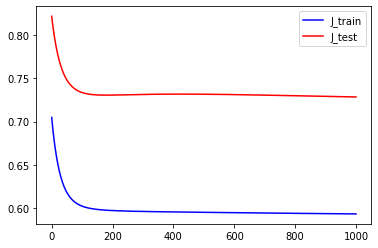

In [11]:
# run gradient descent
theta, costs_train, costs_test, precisions, recalls = gradient_descent(x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy(), alpha=0.05, num_iters=1000)

# Plot the costs during gradient descent
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(2)
plt.plot(range(len(costs_train)), costs_train, "b-")
plt.plot(range(len(costs_test)), costs_test, "r-")
plt.legend(["J_train", "J_test"])
plt.show()

This indicates, that the model is overfitting. Regularization might decrease the test error.
The loss is in a weird interval (0.58 - 0.72) should be higher? Is the implementation correct -> check octave implementation

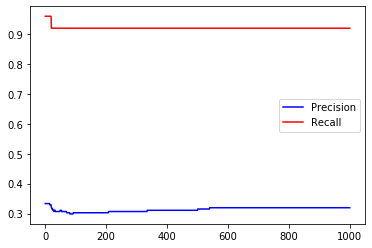

In [12]:
# Plot precision and recall during training
plt.figure(2)
plt.plot(range(len(precisions)), precisions, "b-")
plt.plot(range(len(recalls)), recalls, "r-")
plt.legend(["Precision", "Recall"])
plt.show()

In [13]:
# final recall and precision
print("Recall: {}".format(recalls[-1]))
print("Precision: {}".format(precisions[-1]))

Recall: 0.92
Precision: 0.3194
